# Data Cleaning, Feature Engineering, and Analysis

In [1]:
import pandas as pd
import numpy as np
import re

## Data Cleaning

The data below is in its raw form from the API data extraction phase and will need to be cleaned in order to make use of its information. New features will also need to be engineered to make full use of the data. Any created models will need further analysis to determine their use and accuracy.

** Get file for cleaning**

In [2]:
movies = pd.read_csv('./movieinfo.csv')

In [3]:
movies.head(2)

,Actors,Awards,Country,Director,Episode,Error,Genre,Language,Metascore,Plot,...,Season,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes,seriesID,totalSeasons
0,"Tim Roth, Amanda Plummer, Laura Lovelace, John...",Won 1 Oscar. Another 60 wins & 65 nominations.,USA,Quentin Tarantino,NaN,NaN,"Crime, Drama","English, Spanish, French",94.0,Jules Winnfield (Samuel L. Jackson) and Vincen...,...,NaN,Pulp Fiction,movie,"Quentin Tarantino (story), Roger Avary (story)...",1994,tt0110912,8.9,"1,388,612",NaN,NaN
1,"Andrew Garfield, Emma Stone, Jamie Foxx, Dane ...",3 wins & 29 nominations.,USA,Marc Webb,NaN,NaN,"Action, Adventure, Sci-Fi",English,53.0,We've always known that Spider-Man's most impo...,...,NaN,The Amazing Spider-Man 2,movie,"Alex Kurtzman (screenplay), Roberto Orci (scre...",2014,tt1872181,6.7,"337,618",NaN,NaN


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9951 entries, 0 to 9950
Data columns (total 25 columns):
Actors          9760 non-null object
Awards          7021 non-null object
Country         9786 non-null object
Director        9652 non-null object
Episode         1 non-null float64
Error           154 non-null object
Genre           9773 non-null object
Language        9761 non-null object
Metascore       4575 non-null float64
Plot            9718 non-null object
Poster          9612 non-null object
Rated           8638 non-null object
Released        9568 non-null object
Response        9951 non-null bool
Runtime         9625 non-null object
Season          1 non-null float64
Title           9797 non-null object
Type            9797 non-null object
Writer          9550 non-null object
Year            9797 non-null object
imdbID          9797 non-null object
imdbRating      9662 non-null float64
imdbVotes       9661 non-null object
seriesID        1 non-null object
totalSeasons 

** Need to clean the Episodes Section since we want movies**

In [5]:
movies = movies[movies.Episode.isnull()]

In [6]:
movies = movies.drop(['Episode','Season','seriesID'],1)

In [7]:
movies = movies[movies.totalSeasons.isnull()]

In [8]:
movies = movies.drop('totalSeasons',1)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 0 to 9950
Data columns (total 21 columns):
Actors        9688 non-null object
Awards        6955 non-null object
Country       9716 non-null object
Director      9651 non-null object
Error         154 non-null object
Genre         9704 non-null object
Language      9691 non-null object
Metascore     4575 non-null float64
Plot          9658 non-null object
Poster        9542 non-null object
Rated         8614 non-null object
Released      9504 non-null object
Response      9879 non-null bool
Runtime       9560 non-null object
Title         9725 non-null object
Type          9725 non-null object
Writer        9541 non-null object
Year          9725 non-null object
imdbID        9725 non-null object
imdbRating    9590 non-null float64
imdbVotes     9589 non-null object
dtypes: bool(1), float64(2), object(18)
memory usage: 1.6+ MB


** Need to fix the Errors that came through, apparently around 154 movies did not import properly **

In [10]:
movies['Error'].value_counts()

Error getting data.    154
Name: Error, dtype: int64

In [11]:
movies = movies[movies['Error'] != 'Error getting data.' ]
movies = movies.drop('Error', 1)

** Will not be using poster information, response, or type, will drop it**

In [12]:
movies = movies.drop('Poster',1)

In [13]:
movies = movies.drop('Response',1)

In [14]:
movies = movies.drop('Type',1)

In [15]:
movies = movies.drop('imdbID',1)

** Will keep only the movies that currently have ratings**

In [16]:
movies = movies[movies.Rated.notnull()]

**Removing Metascore since too many important films have not been rated**

This would also limit the model to only having films that were given a metascore when a lot of these films came way before this era.

In [20]:
movies = movies.drop('Metascore',1)

**Cleaning Awards Column by adding 0 for all the nans since it means it received no rewards**

In [18]:
movies['Awards'] = movies['Awards'].fillna(0)

** For the scope of this project, I will drop all NaN values left over to only have rows with fully provided data**

In [24]:
movies = movies.dropna()

In [25]:
movies = movies.reset_index(drop=True)

**For Awards, I will be extracting the numbers from the column and adding them together. Given more time, this would be done by getting key words and numbers attached to them in order to get a column for oscars, nomiations, etc**

In [48]:
def get_awards(string):
    try:
        nums = re.findall(r'\d+', string)
        nums = map(int, nums)
        return sum(nums)
    except:
        return 0

In [49]:
movies['Awards'] = movies['Awards'].apply(get_awards)

**Convert Released, Runtime, Year, and Votes to actual numbers for caculations**

In [53]:
movies['Released'] = pd.to_datetime(movies['Released'])

In [54]:
def get_minutes(string):
    return int(re.findall(r'\d+', string)[0])

In [55]:
movies['Runtime'] = movies['Runtime'].apply(get_minutes)

In [57]:
movies['Year'] = movies['Year'].astype(int)

In [58]:
movies['imdbVotes'] = movies['imdbVotes'].apply(lambda x: x.replace(",",""))

In [59]:
movies['imdbVotes'] = movies['imdbVotes'].astype(int)

In [60]:
months = []
for x in range(len(movies)):
    months.append(movies['Released'][x].month)
    
movies['MonthReleased'] = months

In [61]:
days = []
for x in range(len(movies)):
    days.append(movies['Released'][x].day)
    
movies['DayReleased'] = days

In [62]:
movies.drop('Released',1, inplace=True)

In [63]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 16 columns):
Actors           8475 non-null object
Awards           8475 non-null int64
Country          8475 non-null object
Director         8475 non-null object
Genre            8475 non-null object
Language         8475 non-null object
Plot             8475 non-null object
Rated            8475 non-null object
Runtime          8475 non-null int64
Title            8475 non-null object
Writer           8475 non-null object
Year             8475 non-null int32
imdbRating       8475 non-null float64
imdbVotes        8475 non-null int32
MonthReleased    8475 non-null int64
DayReleased      8475 non-null int64
dtypes: float64(1), int32(2), int64(4), object(9)
memory usage: 993.2+ KB


## NLP Analysis of Words Used in Plot

In [172]:
high_rating = np.percentile(movies['imdbRating'],80)

In [176]:
low_rating = np.percentile(movies['imdbRating'],10)

In [179]:
high_plot = list(movies[movies.imdbRating > high_rating]['Plot'])

In [180]:
low_plot = list(movies[movies.imdbRating < low_rating]['Plot'])

In [181]:
full_plot_high = "".join(high_plot)

In [182]:
full_plot_low = "".join(low_plot)

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [185]:
cvecHigh = TfidfVectorizer(stop_words='english')

In [186]:
cvecLow = TfidfVectorizer(stop_words='english')

In [187]:
cvecHigh.fit([''.join([i for i in full_plot_high if not i.isdigit()]).decode('utf-8')])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [188]:
cvecLow.fit([''.join([i for i in full_plot_low if not i.isdigit()]).decode('utf-8')])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [223]:
df_high  = pd.DataFrame(cvecHigh.transform([full_plot_high.decode('utf-8')]).todense(),
             columns=cvecHigh.get_feature_names())

top_150 = df_high.transpose().sort_values(0, ascending=False).head(200)

In [224]:
df_low  = pd.DataFrame(cvecLow.transform([full_plot_low.decode('utf-8')]).todense(),
             columns=cvecLow.get_feature_names())

low_150 = df_low.transpose().sort_values(0, ascending=False).head(200)

In [225]:
plot_words_in_high = []
for x in top_150.index.values:
    if x not in low_150.index.values:
        plot_words_in_high.append(x)

In [244]:
def found_in_high_plot(string):
    count = 0
    for var in plot_words_in_high:
        if var in string.decode('utf-8'):
            count = count + 1
    return count

In [251]:
movies['GoodWords'] = movies['Plot'].apply(found_in_high_plot)

In [254]:
movies.drop('Plot',1, inplace=True)

In [256]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 16 columns):
Actors           8475 non-null object
Awards           8475 non-null int64
Country          8475 non-null object
Director         8475 non-null object
Genre            8475 non-null object
Language         8475 non-null object
Rated            8475 non-null object
Runtime          8475 non-null int64
Title            8475 non-null object
Writer           8475 non-null object
Year             8475 non-null int32
imdbRating       8475 non-null float64
imdbVotes        8475 non-null int32
MonthReleased    8475 non-null int64
DayReleased      8475 non-null int64
GoodWords        8475 non-null int64
dtypes: float64(1), int32(2), int64(5), object(8)
memory usage: 993.2+ KB


## Some Visuazlizations

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style("white")

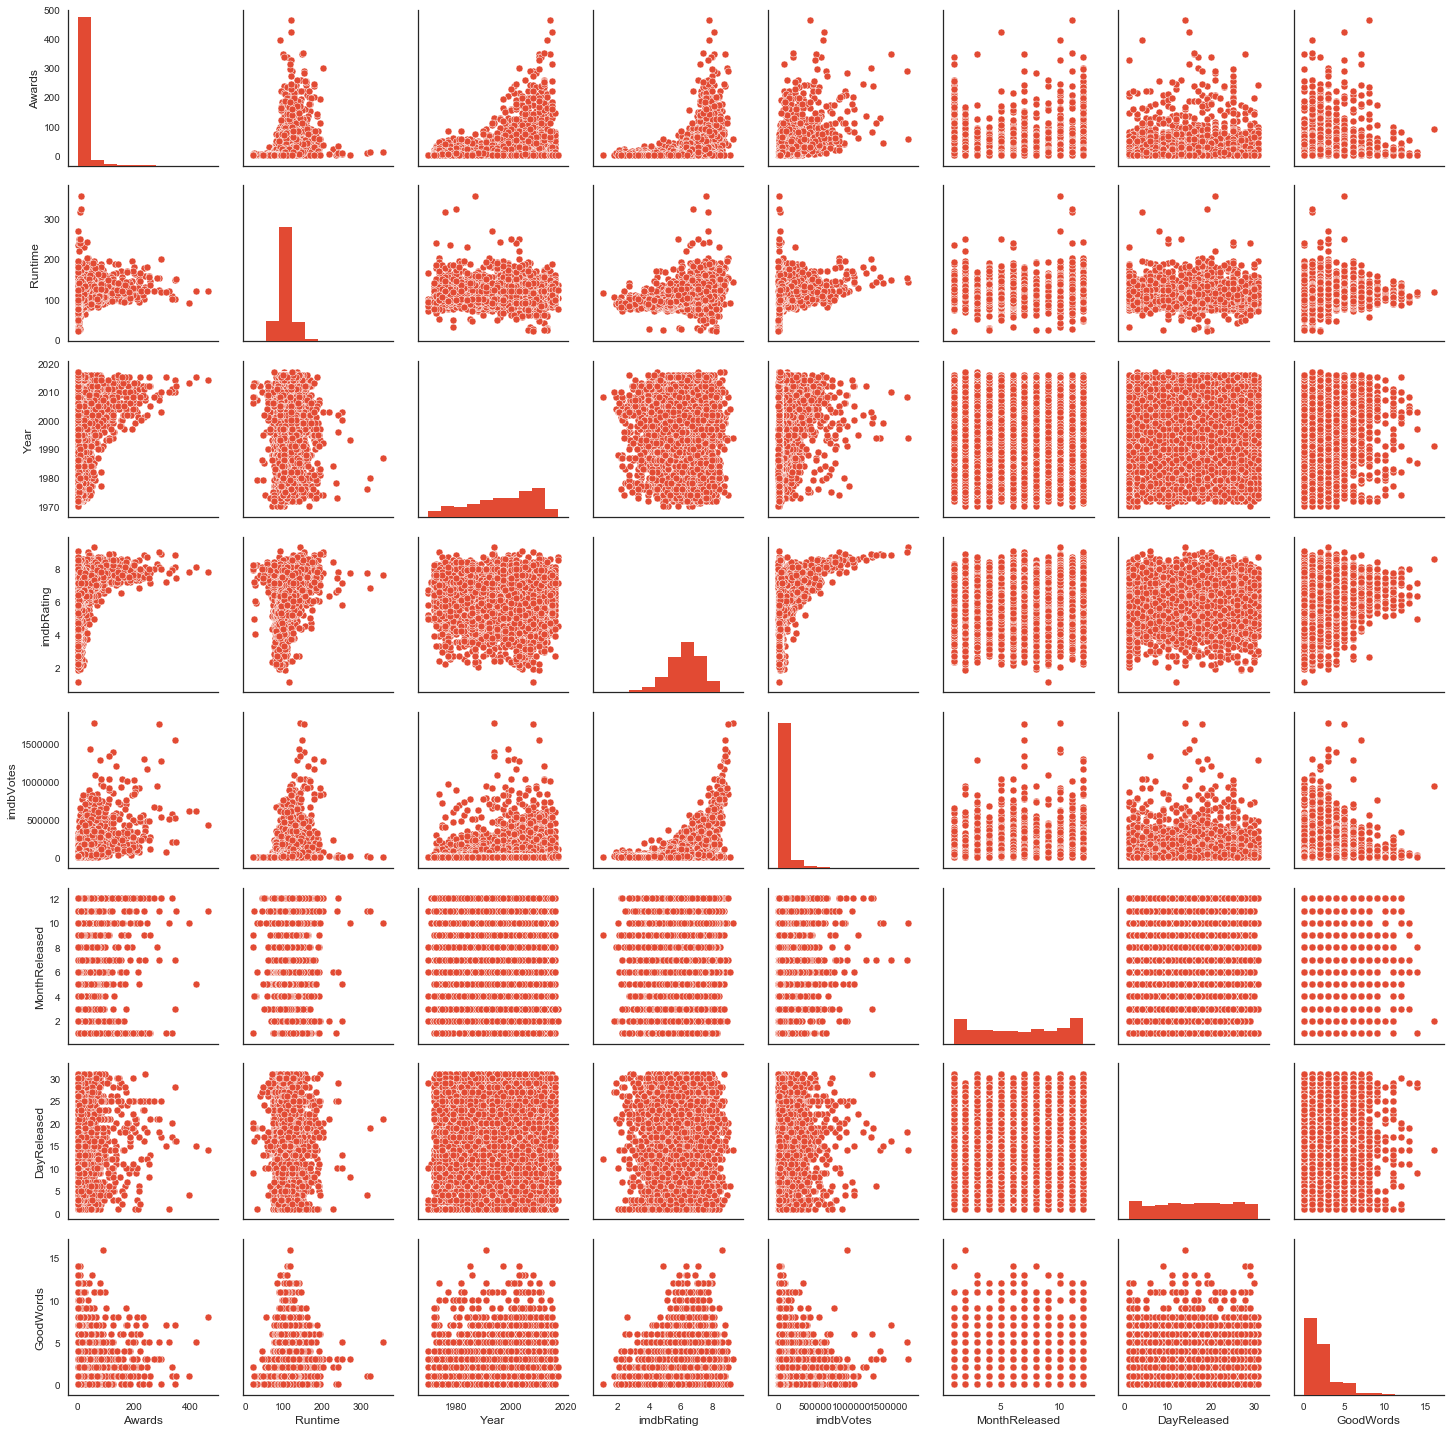

In [257]:
sns.pairplot(movies)

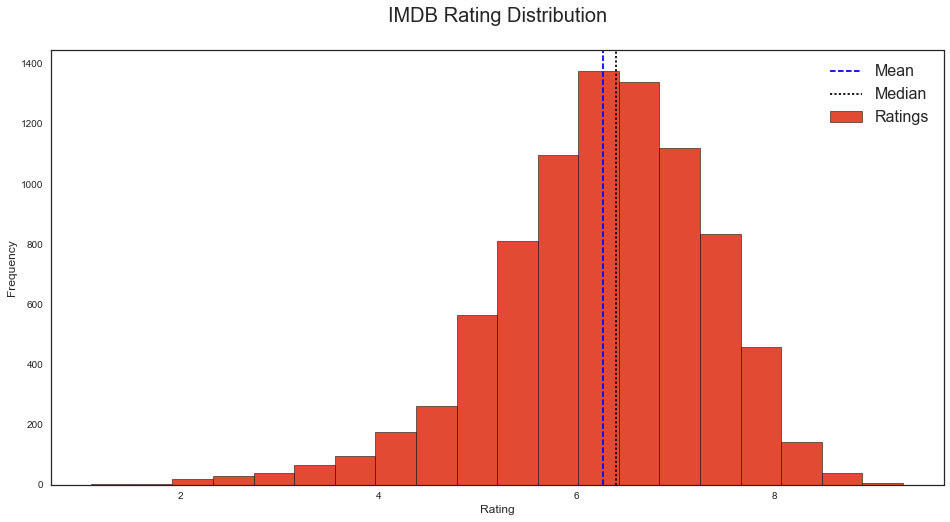

In [258]:
movies['imdbRating'].plot(kind = 'hist', figsize = (16, 8), bins = 20, edgecolor = 'black', label = 'Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title( "IMDB Rating Distribution", fontsize = 20, y=1.05)
plt.axvline(np.mean(movies['imdbRating']), color='b', linestyle='--', label = 'Mean')
plt.axvline(np.median(movies['imdbRating']), color='black', linestyle=':', label = 'Median')
plt.legend(fontsize = 16)
plt.show()

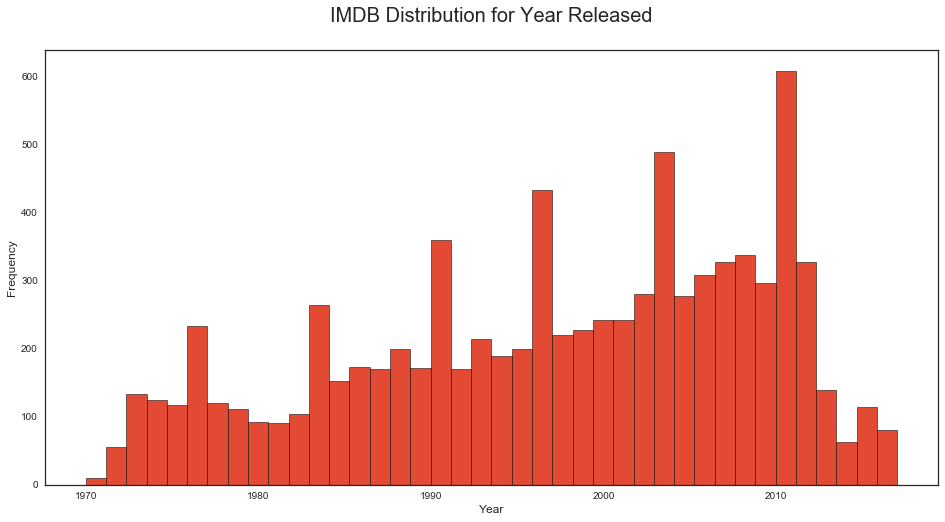

In [259]:
movies['Year'].plot(kind = 'hist', figsize = (16, 8), bins = 40, edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title( "IMDB Distribution for Year Released", fontsize = 20, y=1.05)
plt.show()

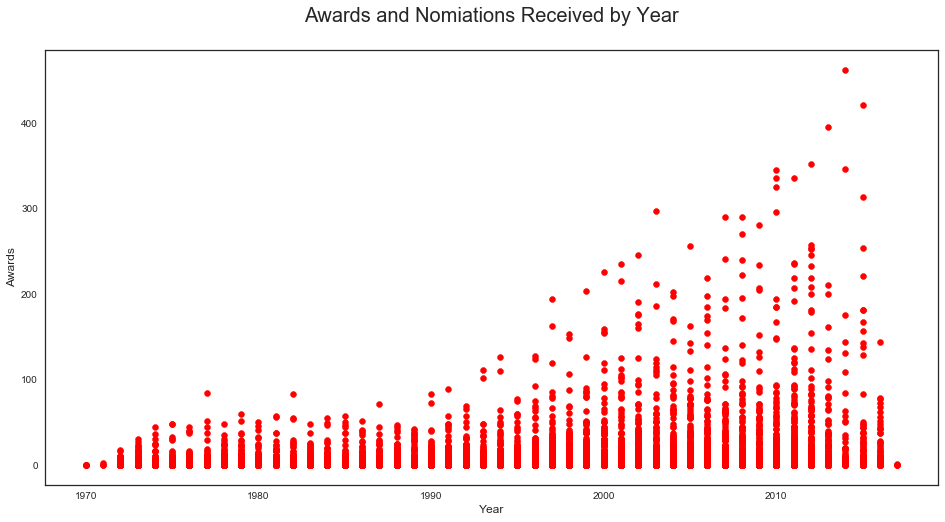

In [260]:
movies.plot(kind = 'scatter',x = 'Year', y = 'Awards', figsize = (16, 8), s = 35, c='r')
plt.xlabel('Year')
plt.ylabel('Awards')
plt.title( "Awards and Nomiations Received by Year", fontsize = 20, y=1.05)
plt.show()

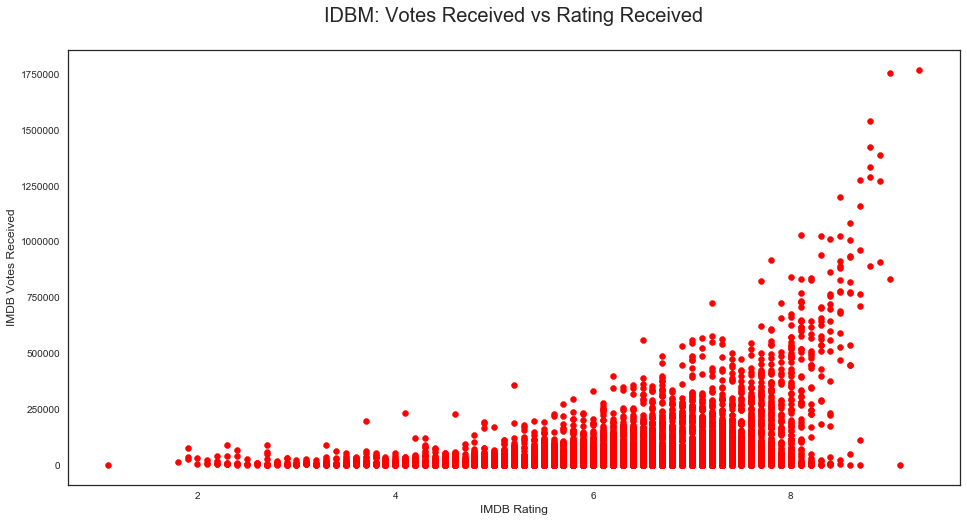

In [261]:
movies.plot(kind = 'scatter',x = 'imdbRating', y = 'imdbVotes', figsize = (16, 8), s = 35, c='r')
plt.xlabel('IMDB Rating')
plt.ylabel('IMDB Votes Received')
plt.title( "IDBM: Votes Received vs Rating Received", fontsize = 20, y=1.05)
plt.show()

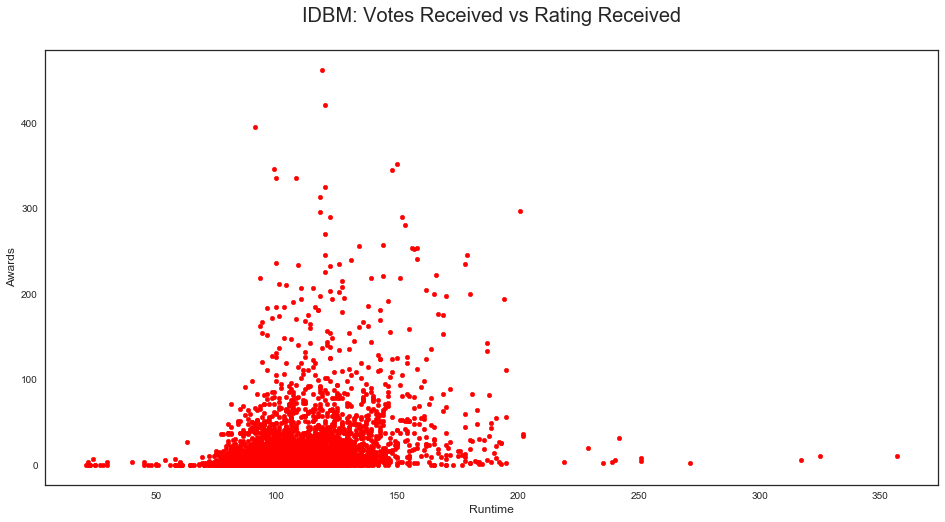

In [262]:
movies.plot(kind = 'scatter',x = 'Runtime', y = 'Awards', figsize = (16, 8), s = 20, c='r')
plt.xlabel('Runtime')
plt.ylabel('Awards')
plt.title( "IDBM: Votes Received vs Rating Received", fontsize = 20, y=1.05)
plt.show()

From the intial vizualizations, it seems the data is very heavy in favor for more recent movies since there are just more movies released in the latter years. 

There also may be a relationship with how good a movie is by how many people decide to vote for it, meaning that some may just be more popular and get a higher rating as opposed to getting an actual good score.

## Generate Features

Make function to generate features from list of words to look for

In [263]:
def generate_binary(elements, col_name):
    for ele in elements:
        
        binary = []

        for x in range(len(movies)):
            if ele in movies[col_name][x]:
                binary.append(1)
            else:
                binary.append(0)
        movies[ele] = binary
    
    movies.drop(col_name,1,inplace=True)

**Get Unique Values for all the Genres found in the movies, clear movies with Nan since most of them seem to be fashion shows etc **

In [264]:
temp = movies['Genre'].astype(str)

In [265]:
genres = set()
temp.str.split(', ').apply(genres.update);
genres = list(genres)

In [266]:
generate_binary(genres,'Genre')

**Get Unique Values for Country and Genereate Features**

fix Ivory coast name to display properly

In [267]:
movies[movies.Title == "Black and White in Color"]

,Actors,Awards,Country,Director,Language,Rated,Runtime,Title,Writer,Year,...,Short,Drama,Action,Documentary,Musical,History,Family,Fantasy,Sport,Biography
6081,"Jean Carmet, Jacques Dufilho, Catherine Rouvel...",2,"Côte d'Ivoire, France, West Germany, Switzerland",Jean-Jacques Annaud,French,PG,90,Black and White in Color,"Jean-Jacques Annaud, Georges Conchon",1976,...,0,1,0,0,0,0,0,0,0,0


In [268]:
movies['Country'][6081]

"C\xc3\xb4te d'Ivoire, France, West Germany, Switzerland"

In [269]:
movies.set_value(6081, 'Country', 'Ivory Coast, France, West Germany, Switzerland');

In [270]:
movies['Country'][6081]

'Ivory Coast, France, West Germany, Switzerland'

In [271]:
temp = movies['Country'].astype(str)

In [272]:
countries = set()
temp.str.split(', ').apply(countries.update);
countries = list(countries)

In [273]:
generate_binary(countries,'Country')

** Create features from Language**

In [274]:
temp = movies['Language'].astype(str)

In [275]:
laguages = set()
temp.str.split(', ').apply(laguages.update);
languages = list(laguages)

In [276]:
generate_binary(languages, 'Language')

**Create features for movie ratings**

In [277]:
temp = movies['Rated'].astype(str)

In [278]:
ratings = set()
temp.str.split('').apply(ratings.update);
ratings = list(ratings)

In [279]:
generate_binary(ratings,'Rated')

** Get Features from Actors **

In [280]:
temp = movies['Actors'].astype(str)

In [281]:
actors = set()
temp.str.split(', ').apply(actors.update);
actors = list(actors)

In [282]:
generate_binary(actors, 'Actors')

**Generate Features from Director**

In [283]:
temp = movies['Director'].astype(str)

In [284]:
directors = set()
temp.str.split(', ').apply(directors.update);
directors = list(directors)

In [285]:
generate_binary(directors,'Director')

**Writers and plot as features**

In [286]:
temp = movies['Writer'].astype(str)

In [287]:
writers = set()
temp.str.split(', ').apply(writers.update);
writers = list(writers)

In [290]:
writers[:15]

['Nicholas Sparks (book)',
 'Stuart Gillard',
 'John Heffernan (story)',
 'Gary Murphy',
 'Pat Jordan (article)',
 'Katie Dippold',
 'James Komack (story)',
 'Nigel McKeand',
 'John Kamps (story)',
 'Gary Rosen (screenplay)',
 'Brett Morgen (screen adaptation)',
 'Nicholas Jarecki (screenplay)',
 'Paul Zindel (teleplay)',
 'Ron Howard (story)',
 'Elana Lesser']

There are just too many variations in the naming, with about 14,000 entries. For this to be useful, it might not be useful to use unless there is more time to process this.

For plot there are some issues in finding good feature words to extract, a model will be created to note the results without plot as features

In [292]:
# movies.drop('Writer',1, inplace=True)
# movies.drop('Plot',1, inplace=True)

**Get Feature Count**

In [293]:
len(list(movies))

16588

In [294]:
movies

,Awards,Runtime,Title,Year,imdbRating,imdbVotes,MonthReleased,DayReleased,GoodWords,Sci-Fi,...,Tony Krantz,David Mamet,Matthew Chapman,Graeme Clifford,Larry Elikann,Harold Becker,Anders Rønnow Klarlund,Monte Hellman,Maurice Joyce,Gy Waldron
0,126,154,Pulp Fiction,1994,8.9,1388612,10,14,4,0,...,0,0,0,0,0,0,0,0,0,0
1,32,142,The Amazing Spider-Man 2,2014,6.7,337618,5,2,7,1,...,0,0,0,0,0,0,0,0,0,0
2,56,142,The Shawshank Redemption,1994,9.3,1771273,10,14,3,0,...,0,0,0,0,0,0,0,0,0,0
3,84,121,Star Wars: Episode IV - A New Hope,1977,8.7,963318,5,25,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45,116,Back to the Future,1985,8.5,773599,7,3,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2,97,The Breakfast Club,1985,7.9,269708,2,15,6,0,...,0,0,0,0,0,0,0,0,0,0
6,8,114,The Goonies,1985,7.8,185900,6,7,2,0,...,0,0,0,0,0,0,0,0,0,0
7,89,118,The Silence of the Lambs,1991,8.6,934689,2,14,16,0,...,0,0,0,0,0,0,0,0,0,0
8,48,127,Jurassic Park,1993,8.1,647873,6,11,3,1,...,0,0,0,0,0,0,0,0,0,0
9,65,88,The Lion King,1994,8.5,682450,6,24,1,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
movies.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 16588 columns):
Awards                               int64
Runtime                              int64
Title                                object
Year                                 int32
imdbRating                           float64
imdbVotes                            int32
MonthReleased                        int64
DayReleased                          int64
GoodWords                            int64
Sci-Fi                               int64
Crime                                int64
Romance                              int64
Animation                            int64
Music                                int64
Adult                                int64
Comedy                               int64
War                                  int64
Horror                               int64
Adventure                            int64
News                                 int64
Thriller                   

**Save DF in case it is lost**

In [297]:
file_name = '../DSI-Movie-Rating-Predictor/cleandataV2.csv'
movies.to_csv(file_name, index = False, encoding='utf-8')

## Modeling

In [4]:
import pandas as pd
import numpy as np

In [298]:
movies = pd.read_csv('./cleandataV2.csv')

KeyboardInterrupt: 

In [8]:
target = np.median(movies['imdbRating'])

In [4]:
np.mean(movies['imdbRating'])

6.274725663716812

Given the distribution of the ratings falling around the median, it may be important to categorize into what is considered good and bad. Something similar to how Youtube categorizes videos (thumbs up and thumbs down). Given more time this might be three categories, good, bad, and neutral. I will utilize the median rating 6.4 as the binary indicator for high/low rating.

In [5]:
def high_rating(rating):
    target = np.median(movies['imdbRating'])
    if rating>= target:
        return 1
    else:
        return 0

In [6]:
movies['HighRating'] = movies['imdbRating'].apply(high_rating)

In [7]:
y = movies['HighRating']
X = movies.drop(['HighRating','imdbRating','Title'],1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Columns: 16585 entries, Awards to Gy Waldron
dtypes: int64(16585)
memory usage: 1.0 GB


In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', n_jobs=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
y_pred = rf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test, y_pred)

0.74007078254030667

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

In [14]:
gb = gb.fit(X_train, y_train)
gb.get_params

<bound method GradientBoostingClassifier.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)>

In [15]:
rf_gb = RandomForestClassifier(max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100)
rf_gb.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
y_pred_rfgb = rf_gb.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred_rfgb)

0.72512780180888714

In [18]:
rf_gb.feature_importances_

array([ 0.74586604,  0.05645531,  0.00844744, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
from sklearn.metrics import confusion_matrix
cnf_mat = np.array(confusion_matrix(y_test, y_pred_rfgb, labels=[1,0]))

In [20]:
confusion = pd.DataFrame(cnf_mat, index=['high rating', 'low rating'],
                         columns=['predicted high rating','predicted low rating'])

In [21]:
confusion

,predicted high rating,predicted low rating
high rating,847,413
low rating,286,997


**Conclusions**

Overall the random forest tree did not improve significantly with gradient boost, however the score in itself was significantly good at a first shot. I think more features could have been engineerined using the description and writers. 

However adding those features might also cause overfitting, so further analysis would need to be done.